<a href="https://colab.research.google.com/github/EnlunaT/2023HFU-Project/blob/main/%E3%80%8C%E5%AE%8C%E6%95%B4%E9%9B%BB%E5%BD%B1%E8%B3%87%E6%96%99%E7%88%AC%E8%9F%B2%E3%80%8D%E5%B0%88%E9%A1%8C%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##將網頁電影各項資料找出來

In [ ]:
from re import U
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from collections import Counter

In [ ]:
URL=["https://www.imdb.com/list/ls093350982/"]
num = [2,3,4,5,6]
for i in range(len(num)):
  URL.append(f"https://www.imdb.com/list/ls093350982/?sort=list_order,asc&st_dt=&mode=detail&page={num[i]}")
print(URL)

['https://www.imdb.com/list/ls093350982/', 'https://www.imdb.com/list/ls093350982/?sort=list_order,asc&st_dt=&mode=detail&page=2', 'https://www.imdb.com/list/ls093350982/?sort=list_order,asc&st_dt=&mode=detail&page=3', 'https://www.imdb.com/list/ls093350982/?sort=list_order,asc&st_dt=&mode=detail&page=4', 'https://www.imdb.com/list/ls093350982/?sort=list_order,asc&st_dt=&mode=detail&page=5', 'https://www.imdb.com/list/ls093350982/?sort=list_order,asc&st_dt=&mode=detail&page=6']


In [ ]:
print("將網頁電影各項資料找出來")

# header = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'}
Year = []
Title = []
Genre= []
Rating = []
Vote = []
smallTitle = []
smallRating = []
smallGenre= []
smallVote= []
popularSmallGenre= []
popularSmallTitle = []
Duration=[]



  # print(votes)
  # Vote.append(votes)

for w in range(len(URL)):
  r = requests.get(URL[w])
  w = w+1
  soup = BeautifulSoup(r.content, 'html.parser')

  p_tags = soup.find_all('p', class_='text-muted text-small')
  for p_tag in p_tags:
    for span_tag in p_tag.find_all('span', {'name': 'nv'}):
      data_value = span_tag.get('data-value')
      Vote.append(float(data_value))
      break

  h3_elements = soup.find_all('h3', {'class': 'lister-item-header'})
  for t in h3_elements:
    # print(t.a['href'])
    URL.append(t.a['href'])
    # print(t.a.text)

    Title.append(t.a.text)

    for year in t('span', {'class': 'lister-item-year text-muted unbold'}):
      numbers = re.findall(r'\d+\.\d+|\d+',year.text)
      Year.append(float(numbers[0]))


  p_elements = soup.find_all('p', {'class': 'text-muted text-small'})
  for g in p_elements:
    for genre in g('span', {'class': 'genre'}):
      Genre.append(genre.text)
    for duration in g('span', {'class': 'runtime'}):
     numbers = re.findall(r'\d+\.\d+|\d+',duration.text)
     Duration.append(float(numbers[0]))
  div_elements = soup.find_all('div', {'class': 'ipl-rating-star small'})

  for b in div_elements:

    rating = b.find('span', {'class': 'ipl-rating-star__rating'})

    Rating.append(float(rating.text))
  combined_list = list(zip(Title, Vote, Rating))


將網頁電影各項資料找出來


##電影長度分布區間

電影長度分布區間
最短電影長度: 65.0
最長電影長度: 209.0


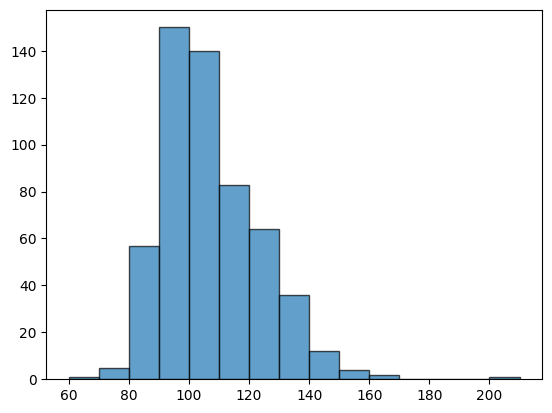

In [ ]:
print("電影長度分布區間")
print("最短電影長度:",min(Duration))
print("最長電影長度:",max(Duration))

bins_1 = [i for i in range(60, 220, 10)]
plt.hist(Duration, bins=bins_1, edgecolor='black', alpha=0.7);


##電影長度分布區間例子

2021年電影長度分布區間


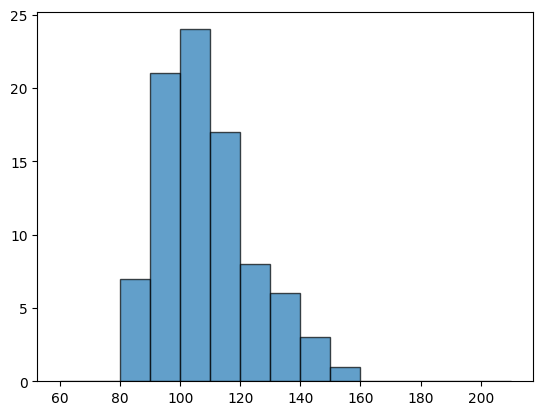

In [ ]:
print("2021年電影長度分布區間")
# print(min(Year))
# print(Duration)
i = 0
movie_2021 =[]

while i < 555:
  if Year[i]==2021:
    movie_2021.append(Duration[i])
  i = i+1

bins_2 = [i for i in range(60, 220, 10)]
plt.hist(movie_2021, bins=bins_2, edgecolor='black', alpha=0.7);

##計算每年原創電影平均長度，老師版本

In [ ]:
from collections import defaultdict


In [ ]:
movie_duration = defaultdict(lambda:list())

for year, duration in zip(Year, Duration):
  movie_duration[int(year)].append(duration)
Movie_average=[]
for i in range(len(movie_duration)):
  Movie_average.append(sum(movie_duration[2014+i])/len(movie_duration[2014+i]))
  i=i+1
print(Movie_average)

[87.0, 121.33333333333333, 96.21739130434783, 100.04255319148936, 105.20270270270271, 104.5068493150685, 108.93069306930693, 108.39080459770115, 108.89655172413794, 111.8103448275862, 107.0]


In [ ]:
print(movie_duration.keys())
print("2015年電影長度",movie_duration[2015])
print("2015年電影平均長度",sum(movie_duration[2015])/len(movie_duration[2015]))

dict_keys([2015, 2016, 2017, 2014, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
2015年電影長度 [137.0, 119.0, 108.0]
2015年電影平均長度 121.33333333333333


##計算每年原創電影平均長度

In [ ]:
print("計算每年原創電影平均長度")
# print(Year)
# print(min(Year))
# print(Duration)
movie_sum = np.zeros((1, 11)).astype(int).tolist()[0]
movie_value = np.zeros((1, 11)).astype(int).tolist()[0]
movie_average = np.zeros((1, 11)).astype(int).tolist()[0]
i = 0
while i < 555:
  if Year[i]==2014:
    movie_sum[0]=movie_sum[0]+Duration[i]
    movie_value[0]=movie_value[0]+1
  elif Year[i]==2015:
    movie_sum[1]=movie_sum[1]+Duration[i]
    movie_value[1]=movie_value[1]+1
  elif Year[i]==2016:
    movie_sum[2]=movie_sum[2]+Duration[i]
    movie_value[2]=movie_value[2]+1
  elif Year[i]==2017:
    movie_sum[3]=movie_sum[3]+Duration[i]
    movie_value[3]=movie_value[3]+1
  elif Year[i]==2018:
    movie_sum[4]=movie_sum[4]+Duration[i]
    movie_value[4]=movie_value[4]+1
  elif Year[i]==2019:
    movie_sum[5]=movie_sum[5]+Duration[i]
    movie_value[5]=movie_value[5]+1
  elif Year[i]==2020:
    movie_sum[6]=movie_sum[6]+Duration[i]
    movie_value[6]=movie_value[6]+1
  elif Year[i]==2021:
    movie_sum[7]=movie_sum[7]+Duration[i]
    movie_value[7]=movie_value[7]+1
  elif  Year[i]==2022:
    movie_sum[8]=movie_sum[8]+Duration[i]
    movie_value[8]=movie_value[8]+1
  elif Year[i]==2023:
    movie_sum[9]=movie_sum[9]+Duration[i]
    movie_value[9]=movie_value[9]+1
  elif  Year[i]==2024:
    movie_sum[10]=movie_sum[10]+Duration[i]
    movie_value[10]=movie_value[10]+1
  i = i+1
for i in range(len(movie_average)):
  movie_average[i]=movie_sum[i]/movie_value[i]
  i=i+1
print("每年電影數量")
print(movie_value)
print("每年電影數量平均長度")
print(movie_average)



計算每年原創電影平均長度
每年電影數量
[1, 3, 23, 47, 74, 73, 101, 87, 87, 58, 1]
每年電影數量平均長度
[87.0, 121.33333333333333, 96.21739130434783, 100.04255319148936, 105.20270270270271, 104.5068493150685, 108.93069306930693, 108.39080459770115, 108.89655172413794, 111.8103448275862, 107.0]


##年份分布情形

查看year分布情形
最早上映電影: 2014
最晚上映電影: 2024


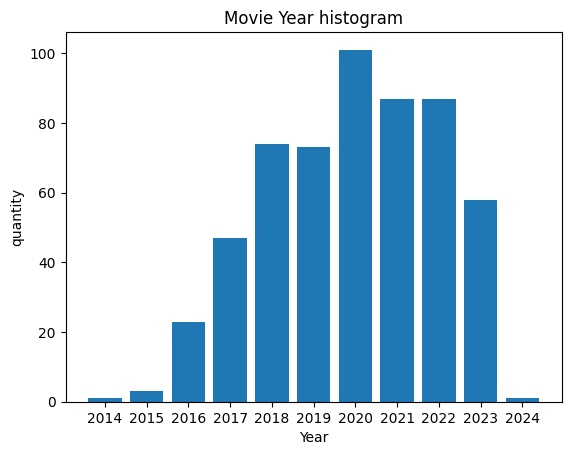

In [ ]:
print("查看year分布情形")
print("最早上映電影:",int(min(Year)))
print("最晚上映電影:",int(max(Year)))

year_counts = Counter(Year)

# 提取年份和相應的數量
unique_years, counts = zip(*sorted(year_counts.items()))

# 使用matplotlib繪製長條圖
plt.bar(unique_years, counts)
# 添加標籤和標題
plt.xlabel('Year')
plt.ylabel('quantity')
plt.title('Movie Year histogram')
# # print(smallGenre)
plt.xticks(unique_years);


##存成CSV

In [ ]:
import csv

# 將資料輸出到CSV檔案
csv_filename = 'movie_data.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # 寫入標題行
    csv_writer.writerow([ 'Title','Year','Genre','Rating','Vote'])

    # 寫入資料行
    for title,year,genre,rating,vote  in zip(Title,Year,Genre,Rating,Vote):
        csv_writer.writerow([title,year,genre,rating,vote])

print(f"資料已輸出到 {csv_filename}")
from google.colab import files

# 上傳檔案到Colab
files.download('movie_data.csv')

資料已輸出到 movie_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Rating分布情形

查看Rating分布情形
最低評分: 2.8
最高評分: 8.2


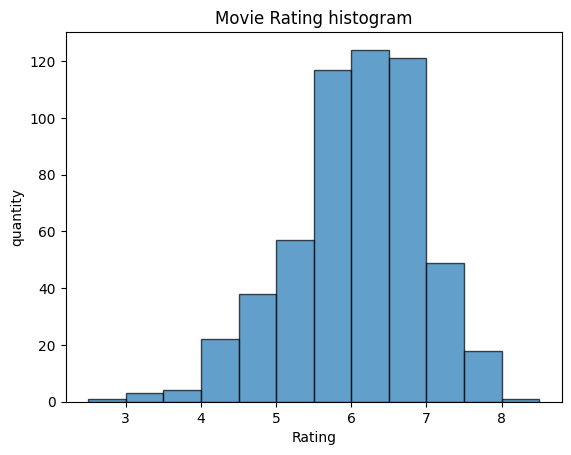

In [ ]:
print("查看Rating分布情形")
print("最低評分:",min(Rating))
print("最高評分:",max(Rating))

bins_3 = [2+0.5*i for i in range(1, 14, 1)]
plt.hist(Rating, bins=bins_3, edgecolor='black', alpha=0.7)
# 添加標籤和標題
plt.xlabel('Rating')
plt.ylabel('quantity')
plt.title('Movie Rating histogram');



##投票分布區間

投票數量分布區間
最低投票數: 103
最高投票數: 588860


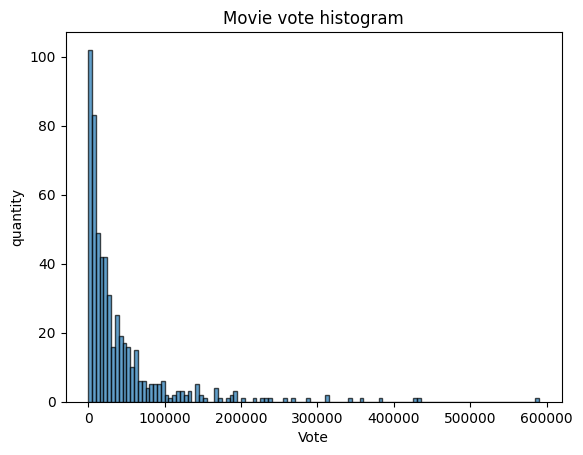

In [ ]:
print("投票數量分布區間")
print("最低投票數:",int(min(Vote)))
print("最高投票數:",int(max(Vote)))
bins_4 = [i for i in range(0, 591000, 5000)]
plt.hist(Vote, bins=bins_4, edgecolor='black', alpha=0.7)
# 添加標籤和標題
plt.xlabel('Vote')
plt.ylabel('quantity')
plt.title('Movie vote histogram');

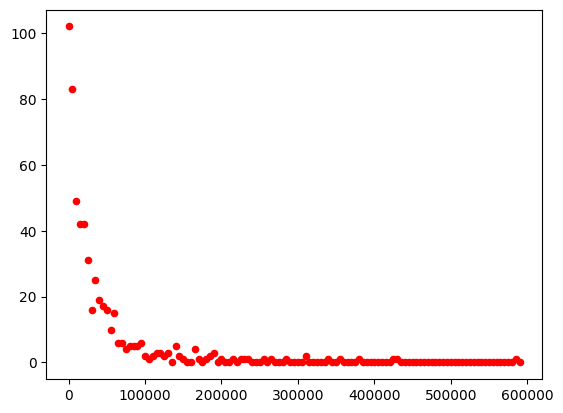

In [ ]:
Vote_Value =[]

# 獲取直方圖數據
hist, edges = np.histogram(Vote, bins=bins_4)

# 將區間和頻率一一對應
result = dict(zip(edges[:-1], hist))

# 輸出每個區間對應的數量
for key, value in result.items():
    # print(f"區間 {key} 的數量: {value}")
    Vote_Value.append(value)
# 對數據做微調整
for i in range(len(Vote_Value)):
  Vote_Value[i]=Vote_Value[i]+0.001
Vote_Value.append(0.001)
len(Vote_Value)
plt.scatter(bins_4, Vote_Value, color='red', label='Data Points', s=20)

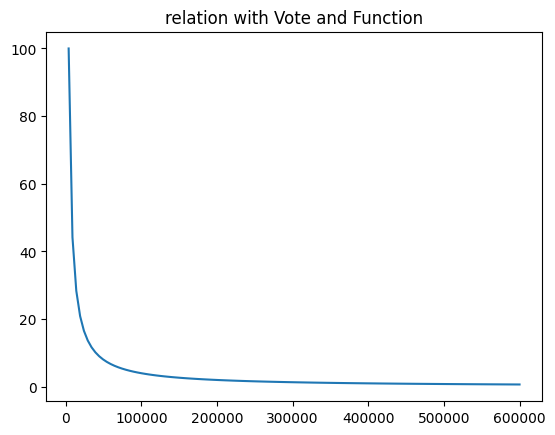

In [ ]:
# 繪製函數曲線
x_curve = np.linspace(0.01, 1.5, 119)
y_curve = 1 / x_curve
plt.title('relation with Vote and Function')
# 繪製函數曲線
plt.plot(400000*x_curve, y_curve, label='y = 1/x');


找出Vote曲線對應函數關係


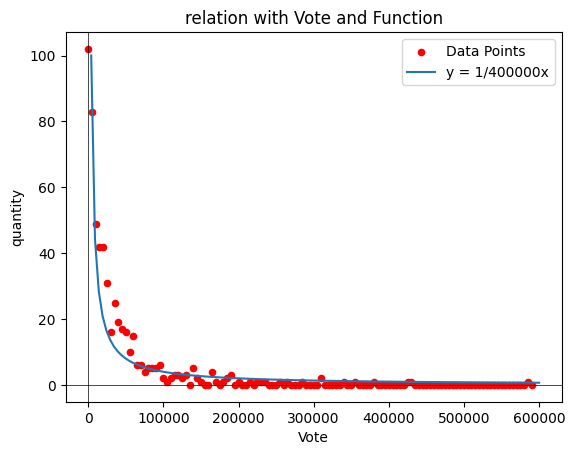

In [ ]:
print("找出Vote曲線對應函數關係")
plt.scatter(bins_4, Vote_Value, color='red', label='Data Points', s=20)
# 繪製函數曲線
x_curve = np.linspace(0.01, 1.5, 119)
y_curve = 1 / x_curve

# 繪製函數曲線
plt.plot(400000*x_curve, y_curve, label='y = 1/400000x')
# 添加標籤和標題
plt.xlabel('Vote')
plt.ylabel('quantity')
plt.title('relation with Vote and Function')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# 顯示圖例
plt.legend();

In [ ]:
correlation_coefficient = np.corrcoef(Vote_Value, y_curve)[0, 1]

print(f"相關係數: {correlation_coefficient}")

相關係數: 0.9363375411941459


##小眾數量判定

In [ ]:
print("小眾數量判定")
i = 0
while i < 555:
  if Vote[i] < 20000:
    sumSmallVote = sumSmallVote + Vote[i]
  i = i+1
print("sumSmallVote=",int(sumSmallVote))
print("Vote小於20000比例為=",sumSmallVote/sum(Vote))

小眾數量判定
sumSmallVote= 2185348
Vote小於20000比例為= 0.09691088429938025


##將小眾電影取出

In [ ]:
i = 0
while i < 555:
  if Vote[i]<20000:
    smallTitle.append(Title[i])
    smallRating.append(Rating[i])
    smallGenre.append(Genre[i])
    smallVote.append(Vote[i])
  i=i+1

276



##畫出小眾電影投票數

小眾電影最低投票數: 103
小眾電影最高投票數: 19743


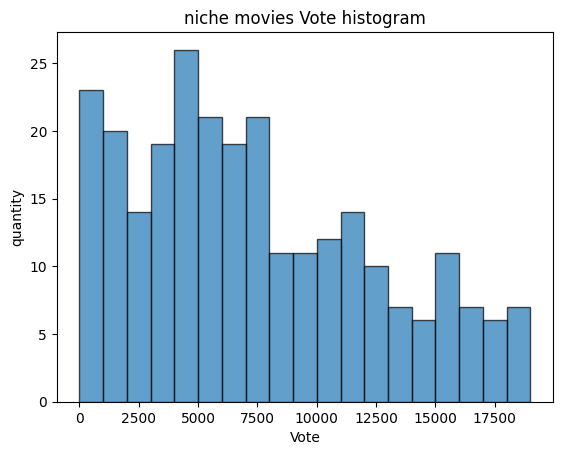

In [ ]:
print("小眾電影最低投票數:",int(min(smallVote)))
print("小眾電影最高投票數:",int(max(smallVote)))
bbins_5 = [i for i in range(0, 20000, 1000)]
plt.hist(smallVote, bins=bbins_5, edgecolor='black', alpha=0.7)
# 添加標籤和標題
plt.xlabel('Vote')
plt.ylabel('quantity')
plt.title('niche movies Vote histogram');


##畫出小眾電影的評分分布圖

畫出小眾電影的評分分布圖
number of smallmovie= 276
min of smallRating= 2.8
max of smallRating= 7.7


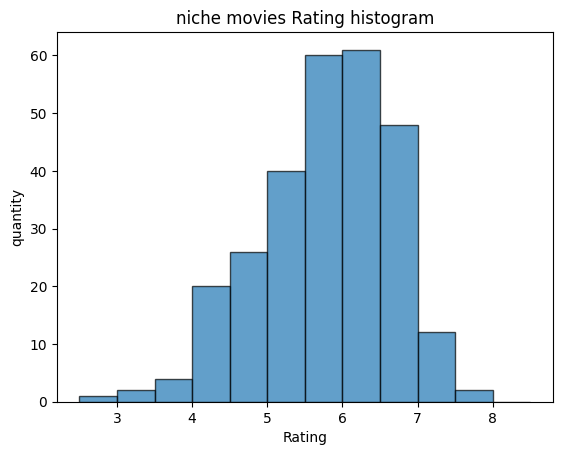

In [ ]:
print("畫出小眾電影的評分分布圖")
print("number of smallmovie=",len(smallRating))
print("min of smallRating=",min(smallRating))
print("max of smallRating=",max(smallRating))

bbins_6=[2+0.5*i for i in range(1, 14, 1)]
plt.hist(smallRating, bins=bbins_6, edgecolor='black', alpha=0.7)
# 添加標籤和標題
plt.xlabel('Rating')
plt.ylabel('quantity')
plt.title('niche movies Rating histogram');


##小眾的優質電影

In [ ]:
print("將一個標準差以上的定義為小眾的優質電影")

small_movie_number = len(smallRating)
smallRatingAverage = sum(smallRating)/small_movie_number
print("平均數:",smallRatingAverage)
# 使用numpy的std函數計算標準差
standard_deviation = np.std(smallRating)
# 打印結果
print("標準差:",standard_deviation)
i = 0

while i < small_movie_number:
  if smallRating[i]>smallRatingAverage+standard_deviation:
    popularSmallGenre.append(smallGenre[i])
    popularSmallTitle.append(smallTitle[i])
  i = i+1
print("優質小眾電影數量:",len(popularSmallTitle))

將一個標準差以上的定義為小眾的優質電影
平均數: 5.723188405797099
標準差: 0.8782220061234446
優質小眾電影數量: 40


##畫出小眾優質電影中喜好類型分布

畫出小眾優質電影中喜好類型分布


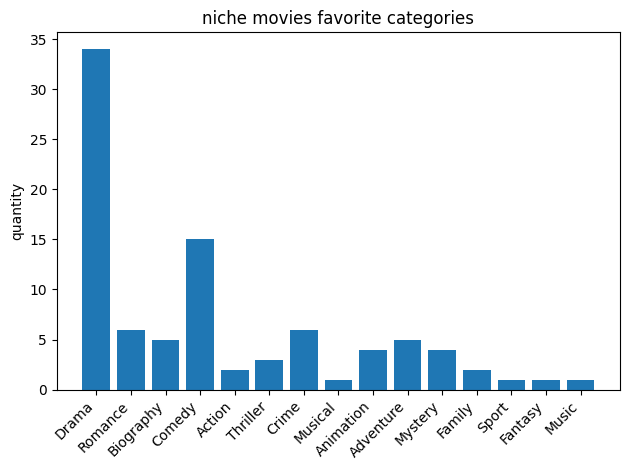

In [ ]:
print("畫出小眾優質電影中喜好類型分布")
clear_blanks = [word.replace(" ", "") for word in popularSmallGenre]
Clear_LineBreaks = [word.replace("\n", "") for word in clear_blanks]
split_list = [word for item in Clear_LineBreaks for word in item.split(',')]

# 使用Counter計算列表中每個元素的數量
word_counts = Counter(split_list)

# 取得字串和對應的出現次數
words = list(word_counts.keys())
counts = list(word_counts.values())
plt.title('niche movies favorite categories')
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.ylabel('quantity');
plt.tight_layout()

# 顯示長條圖
# plt.show()

##符合多數人喜好的小眾優質電影

In [ ]:
print("找出符合Drama和Comedy的電影")
target_string_1 = "Drama"
target_string_2 = "Comedy"

# 使用enumerate和列表生成式進行過濾，同時獲取索引
filtered_list_with_indices = [(index, word)
for index, word in enumerate(popularSmallGenre)
if all(target in word for target in [target_string_1, target_string_2])]
print("共有",len(filtered_list_with_indices),"部電影符合")
# 打印結果
for index, word in filtered_list_with_indices:
    print("movie:",popularSmallTitle[index])
    print(f"Index: {index}, Word: {word}")



找出符合Drama和Comedy的電影
共有 9 部電影符合
movie: Paddleton
Index: 9, Word: 
Comedy, Drama            
movie: Beats
Index: 10, Word: 
Comedy, Crime, Drama            
movie: Serious Men
Index: 16, Word: 
Comedy, Drama            
movie: The Forty-Year-Old Version
Index: 17, Word: 
Comedy, Drama            
movie: Just Another Christmas
Index: 19, Word: 
Comedy, Drama            
movie: Pagglait
Index: 21, Word: 
Comedy, Drama            
movie: Jaadugar
Index: 32, Word: 
Comedy, Drama, Fantasy            
movie: Faraway
Index: 37, Word: 
Comedy, Drama, Romance            
movie: Kathal: A Jackfruit Mystery
Index: 38, Word: 
Comedy, Crime, Drama            


In [ ]:
i = 0
while i<555:
  if Title[i]=="Paddleton":
    print(i)
  i=i+1
print(Vote[149])

149
15227.0


##所有電影類別統計

畫出所有電影中喜好類型分布


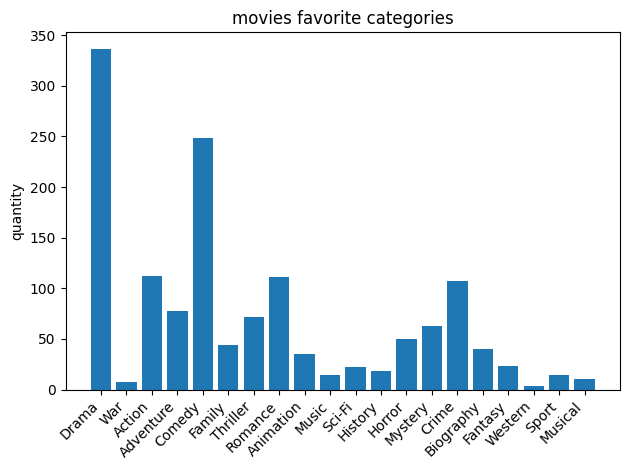

In [ ]:
print("畫出所有電影中喜好類型分布")
cleaned_list = [word.replace(" ", "") for word in Genre]
cleaned_list = [word.replace("\n", "") for word in cleaned_list]
split_list = [word for item in cleaned_list for word in item.split(',')]

# 使用Counter計算列表中每個元素的數量
word_counts = Counter(split_list)

# 取得字串和對應的出現次數
words = list(word_counts.keys())
counts = list(word_counts.values())
plt.title('movies favorite categories')
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.ylabel('quantity')
plt.tight_layout()

# 顯示長條圖
# plt.show()

##比例尋找

In [ ]:
print("找出符合Drama和Comedy的電影")
target_string_1 = "Drama"
target_string_2 = "Comedy"

# 使用enumerate和列表生成式進行過濾，同時獲取索引
filtered_list_with_indices3 = [(index, word)
for index, word in enumerate(Genre)
if all(target in word for target in [target_string_1,target_string_2])]

print("共有",len(filtered_list_with_indices3),"部電影符合")
# # 打印結果
# for index, word in filtered_list_with_indices:
#     print("movie:",smallTitle[index])
#     print(f"Index: {index}, Word: {word}")

找出符合Drama和Comedy的電影
共有 101 部電影符合


In [ ]:
print("找出符合Drama和Comedy的小眾電影")
target_string_1 = "Drama"
target_string_2 = "Comedy"

# 使用enumerate和列表生成式進行過濾，同時獲取索引
filtered_list_with_indices2 = [(index, word)
for index, word in enumerate(smallGenre)
if all(target in word for target in [target_string_1,target_string_2])]

print("共有",len(filtered_list_with_indices2),"部電影符合")
# # 打印結果
# for index, word in filtered_list_with_indices:
#     print("movie:",smallTitle[index])
#     print(f"Index: {index}, Word: {word}")


找出符合Drama和Comedy的小眾電影
共有 58 部電影符合


In [ ]:
print("電影數量:",len(Title))
print("小眾電影數量:",len(smallTitle))
print("小眾優良電影數量:",len(popularSmallTitle),"\n")

print("小眾電影佔電影數量百分比:",100*len(smallTitle)/len(Title),"%")
print("小眾優良電影佔小眾電影百分比:",100*len(popularSmallTitle)/len(smallTitle),"%\n")

print("drama和comedy佔電影數量百分比:",100*len(filtered_list_with_indices3)/len(Genre),"%")
print("drama和comedy佔小眾電影數量百分比:",100*len(filtered_list_with_indices2)/len(smallGenre),"%")
print("drama和comedy佔小眾優良電影數量百分比:",100*len(filtered_list_with_indices)/len(popularSmallGenre),"%")



電影數量: 555
小眾電影數量: 276
小眾優良電影數量: 40 

小眾電影佔電影數量百分比: 49.729729729729726 %
小眾優良電影佔小眾電影百分比: 14.492753623188406 %

drama和comedy佔電影數量百分比: 18.1981981981982 %
drama和comedy佔小眾電影數量百分比: 21.014492753623188 %
drama和comedy佔小眾優良電影數量百分比: 22.5 %
